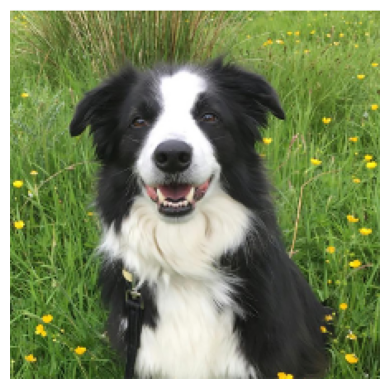

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [4]:
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# 데이터셋 경로 설정
dataset_path = '/Users/zynkimland/Desktop/coding/sv/archive/Expert_Train/Expert_TrainEval'

# 이미지와 나이 정보 가져오기
images = []
ages = []

age_classes = ['Senior', 'Adult', 'Young']

for age_class in age_classes:
    age_class_path = os.path.join(dataset_path, age_class)
    image_files = os.listdir(age_class_path)
    
    for image_file in image_files:
        image_path = os.path.join(age_class_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
        ages.append(age_classes.index(age_class))

# 데이터 전처리
resized_images = []
for image in images:
    resized_image = cv2.resize(image, (224, 224))
    resized_images.append(resized_image)

# 데이터셋 분할
num_samples = len(resized_images)
train_samples = int(0.8 * num_samples)
train_images, train_labels = resized_images[:train_samples], ages[:train_samples]
test_images, test_labels = resized_images[train_samples:], ages[train_samples:]

# 이미지 출력
plt.imshow(train_images[0])
plt.axis('off')
plt.show()

# 전이 학습 모델 불러오기
resnet50_pre = tf.keras.applications.resnet.ResNet50(weights='imagenet', input_shape=(224, 224, 3))

# 모델 아키텍처 출력
resnet50_pre.summary()

# dataset numpy배열로 변환
train_images = np.array(train_images)
train_labels = np.array(train_labels)



# 모델 학습
resnet50_pre.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
resnet50_pre.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# 모델 평가
test_images = np.array(test_images)
test_labels = np.array(test_labels)

test_loss, test_accuracy = resnet50_pre.evaluate(test_images, test_labels)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# 모델 저장
resnet50_pre.save('강아지_나이_분류_모델.h5')


1/1 [==============================] - 0s 458ms/step


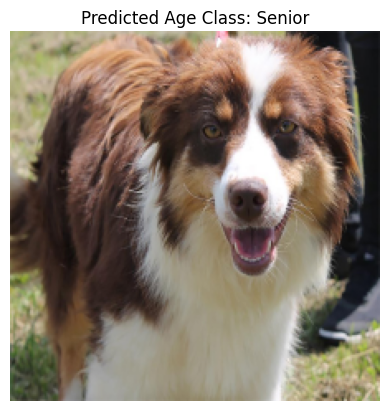

In [5]:
# 테스트할 이미지 선택
test_image = test_images[0]

# 이미지 예측
predictions = resnet50_pre.predict(np.expand_dims(test_image, axis=0))

# 예측 결과 확인
predicted_class_index = np.argmax(predictions)
predicted_age_class = age_classes[predicted_class_index]

# 결과 출력
plt.imshow(test_image)
plt.axis('off')
plt.title('Predicted Age Class: ' + predicted_age_class)
plt.show()

1/1 [==============================] - 0s 64ms/step


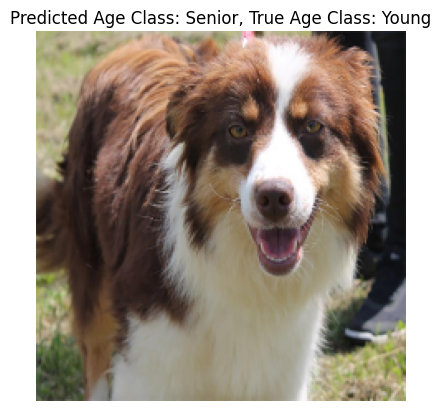

In [6]:
# 테스트할 이미지 선택
test_image = test_images[0]

# 이미지 예측
predictions = resnet50_pre.predict(np.expand_dims(test_image, axis=0))

# 예측 결과 확인
predicted_class_index = np.argmax(predictions)
predicted_age_class = age_classes[predicted_class_index]

# 실제 정답 확인
true_age_class = age_classes[test_labels[0]]

# 결과 출력
plt.imshow(test_image)
plt.axis('off')
plt.title('Predicted Age Class: ' + predicted_age_class + ', True Age Class: ' + true_age_class)
plt.show()



1/1 [==============================] - 0s 61ms/step


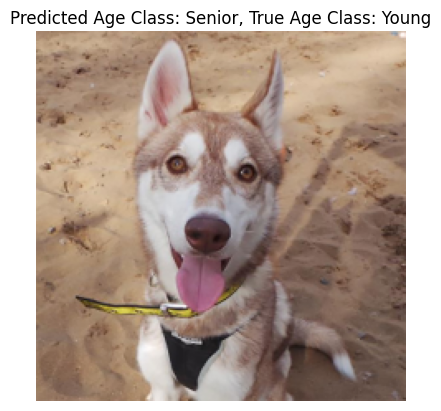

In [7]:
# 테스트할 이미지 선택
test_image = test_images[4]

# 이미지 예측
predictions = resnet50_pre.predict(np.expand_dims(test_image, axis=0))

# 예측 결과 확인
predicted_class_index = np.argmax(predictions)
predicted_age_class = age_classes[predicted_class_index]

# 실제 정답 확인
true_age_class = age_classes[test_labels[0]]

# 결과 출력
plt.imshow(test_image)
plt.axis('off')
plt.title('Predicted Age Class: ' + predicted_age_class + ', True Age Class: ' + true_age_class)
plt.show()


1/1 [==============================] - 0s 60ms/step


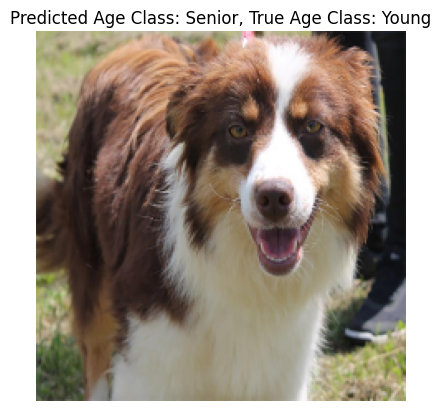

In [8]:
# 테스트할 이미지 선택
test_image = test_images[0]

# 이미지 예측
predictions = resnet50_pre.predict(np.expand_dims(test_image, axis=0))

# 예측 결과 확인
predicted_class_index = np.argmax(predictions)
predicted_age_class = age_classes[predicted_class_index]

# 실제 정답 확인
true_age_class = age_classes[test_labels[0]]

# 결과 출력
plt.imshow(test_image)
plt.axis('off')
plt.title('Predicted Age Class: ' + predicted_age_class + ', True Age Class: ' + true_age_class)
plt.show()


1/1 [==============================] - 0s 60ms/step


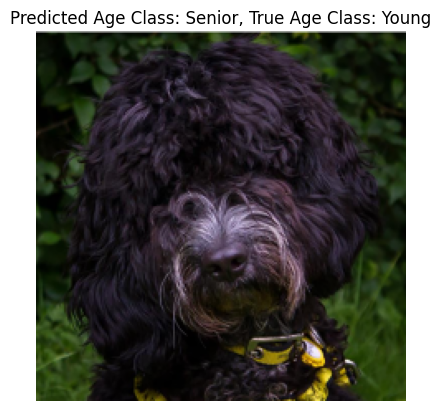

In [9]:
# 테스트할 이미지 선택
test_image = test_images[6]

# 이미지 예측
predictions = resnet50_pre.predict(np.expand_dims(test_image, axis=0))

# 예측 결과 확인
predicted_class_index = np.argmax(predictions)
predicted_age_class = age_classes[predicted_class_index]

# 실제 정답 확인
true_age_class = age_classes[test_labels[6]]

# 결과 출력
plt.imshow(test_image)
plt.axis('off')
plt.title('Predicted Age Class: ' + predicted_age_class + ', True Age Class: ' + true_age_class)
plt.show()


Epoch 1/10
22/22 [==============================] - 96s 4s/step - loss: 0.1071 - accuracy: 0.9626 - val_loss: 0.8816 - val_accuracy: 0.7816
Epoch 2/10
22/22 [==============================] - 109s 5s/step - loss: 0.1078 - accuracy: 0.9540 - val_loss: 3.3216 - val_accuracy: 0.3506
Epoch 3/10
22/22 [==============================] - 114s 5s/step - loss: 0.0370 - accuracy: 0.9871 - val_loss: 2.2274 - val_accuracy: 0.6149
Epoch 4/10
22/22 [==============================] - 118s 5s/step - loss: 0.0205 - accuracy: 0.9943 - val_loss: 4.0313 - val_accuracy: 0.1782
Epoch 5/10
22/22 [==============================] - 121s 6s/step - loss: 0.0401 - accuracy: 0.9885 - val_loss: 3.5539 - val_accuracy: 0.3621
Epoch 6/10
22/22 [==============================] - 117s 5s/step - loss: 0.0265 - accuracy: 0.9928 - val_loss: 7.9840 - val_accuracy: 0.0517
Epoch 7/10
22/22 [==============================] - 116s 5s/step - loss: 0.0258 - accuracy: 0.9914 - val_loss: 4.5314 - val_accuracy: 0.2529
Epoch 8/10
22/

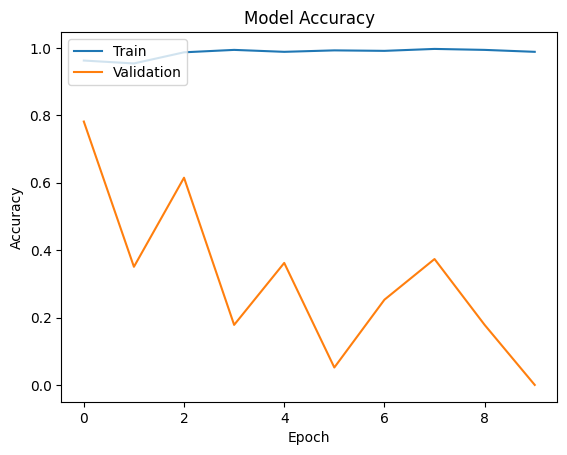

7/7 [==============================] - 10s 1s/step - loss: 48.7935 - accuracy: 0.0000e+00
Test Loss: 48.793487548828125
Test Accuracy: 0.0


In [10]:
# 모델 학습
history = resnet50_pre.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# 학습 과정 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 모델 평가
test_loss, test_accuracy = resnet50_pre.evaluate(test_images, test_labels)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# 모델 저장
resnet50_pre.save('강아지_나이_분류_모델_ver2.h5')

1/1 [==============================] - 0s 58ms/step


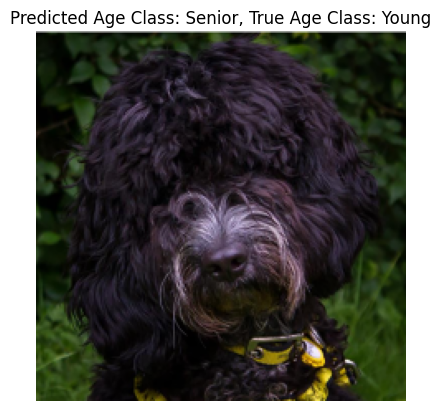

In [11]:
# 테스트할 이미지 선택
test_image = test_images[6]

# 이미지 예측
predictions = resnet50_pre.predict(np.expand_dims(test_image, axis=0))

# 예측 결과 확인
predicted_class_index = np.argmax(predictions)
predicted_age_class = age_classes[predicted_class_index]

# 실제 정답 확인
true_age_class = age_classes[test_labels[6]]

# 결과 출력
plt.imshow(test_image)
plt.axis('off')
plt.title('Predicted Age Class: ' + predicted_age_class + ', True Age Class: ' + true_age_class)
plt.show()


In [13]:
# 추가 이미지 폴더 경로 설정
additional_dataset_path = '/Users/zynkimland/Desktop/coding/sv/archive/PetFinder_All/PetFinder_All'

# 추가 이미지와 나이 정보 가져오기
additional_images = []
additional_ages = []

for age_class in age_classes:
    age_class_path = os.path.join(additional_dataset_path, age_class)
    image_files = os.listdir(age_class_path)
    
    for image_file in image_files:
        image_path = os.path.join(age_class_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        additional_images.append(img)
        additional_ages.append(age_classes.index(age_class))

# 데이터 전처리
resized_additional_images = []
for image in additional_images:
    resized_image = cv2.resize(image, (224, 224))
    resized_additional_images.append(resized_image)

# 데이터셋 분할
additional_images = np.array(resized_additional_images)
additional_labels = np.array(additional_ages)

# 추가 이미지 학습
resnet50_pre.fit(additional_images, additional_labels, epochs=10, validation_split=0.2)